In [2]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

from scipy.io import wavfile
import math
import numpy as np
from scipy import signal
import scipy.signal as sps
from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

audio_fpath = "audio/speech+noise/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  10


In [3]:
print(audio_clips)
print(audio_fpath)

['sn-001.wav', 'sn-002.wav', 'sn-003.wav', 'sn-004.wav', 'sn-005.wav', 'sn-006.wav', 'sn-007.wav', 'sn-008.wav', 'sn-009.wav', 'sn-010.wav']
audio/speech+noise/


In [4]:
samplerate, data = wavfile.read(audio_fpath + audio_clips[0])
print(type(data), type(samplerate))
print(data.shape, samplerate)

<class 'numpy.ndarray'> <class 'int'>
(83520,) 48000


In [16]:
Fs1 = samplerate
Fs2 = 11025
N = len(data)
total_time = (N-1)/Fs1
Max_Signal_Frequency =Fs2/2
New_sample_amount = math.ceil(Fs2*total_time)
Stereo = np.zeros(New_sample_amount)
Left_channel = data[:]


In [17]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [18]:
Original_signal = data[:]
 
Anti_Aliased_signal = np.array(butter_lowpass_filter(Original_signal,Max_Signal_Frequency-1,Fs1))
Down_sampled_signal = np.array(sps.resample(Anti_Aliased_signal,New_sample_amount))
 
Stereo = Down_sampled_signal

print(np.shape(Stereo))
Stereo= Stereo.transpose()

(19184,)


Text(0.5, 0, 'Time [sec]')

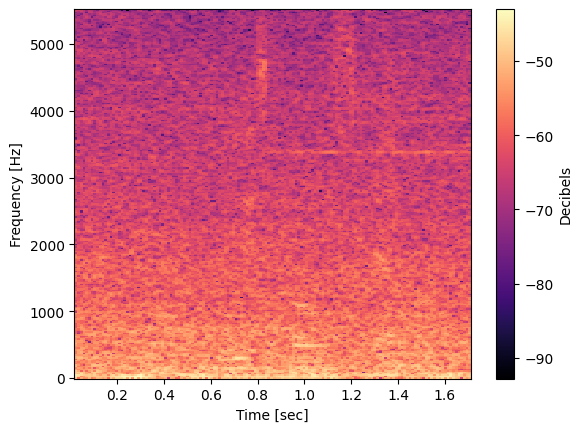

In [20]:
#Change directories as required
f, t, Lxx = signal.spectrogram(x = Stereo, fs = Fs2, window = 'hann',nperseg = 512,noverlap = 384,nfft = 512,detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='magnitude')
plt.pcolormesh(t, f, 10 * np.log10(Lxx), cmap ='magma')
plt.colorbar(label='Decibels')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

FileNotFoundError: [Errno 2] No such file or directory: 'Spectrogram_Plots\\Phase_Plot_Left.png'

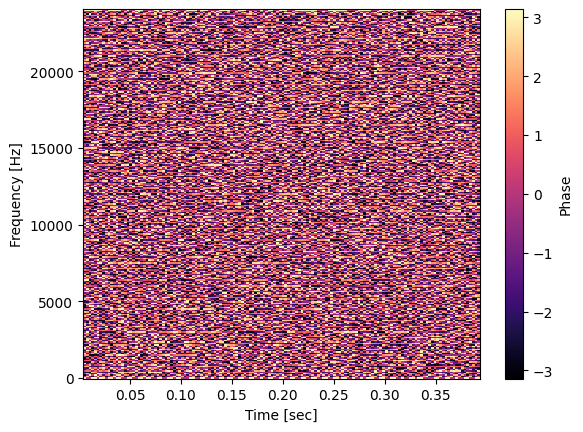

In [15]:
Phase, t_phase, Lxx_Phase = signal.spectrogram( x = Stereo, fs = Fs2, window = 'hann', nperseg = 512,noverlap = 384,nfft = 512,detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='angle')
plt.pcolormesh(t_phase, Phase, Lxx_Phase, cmap ='magma')
plt.colorbar(label='Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')